# Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics

In [5]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 4.8MB/s 


In [6]:
# setting graphical params
category_order = ["a","b","c","d","e"]
custom_palette = {"a":"forestgreen",
                  "b":"mediumseagreen",
                  "c":"gold",
                  "d":"darkorange",
                  "e":"orangered",
                  "Missing":"blue"}

# Loading Data

In [7]:
# loading data
data_scaled = pd.read_csv("/content/drive/My Drive/DATASETS/ML/P2/data_scaled.csv")

data_scaled.head(5)

,energy_kcal_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutriscore_grade
0,0.569256,-0.412615,-0.297111,1.568707,0.065523,-0.123604,0.048719,Missing
1,-0.382323,-0.338420,-0.412019,0.076935,0.416653,-0.393237,0.877005,d
2,-1.409938,-0.845419,-0.699289,-0.801432,-0.666833,-0.882572,0.214376,Missing
3,-1.191891,-0.659931,-0.568712,-0.612692,-0.536413,-0.702817,-0.015991,Missing
4,-1.348438,-0.826870,-0.686232,-0.783284,-0.491268,-0.812667,-0.204944,b


# MODELING


## known, unknown split

In [8]:
data_unknown = data_scaled[data_scaled["nutriscore_grade"] == "Missing"]
index = data_unknown.index
data_model = data_scaled.drop(index)

In [9]:
data_unknown = data_scaled[data_scaled["nutriscore_grade"] == "Missing"]
index = data_unknown.index
data_model = data_scaled.drop(index)

## Encoding

In [10]:
#Label Encoding phase to numeric conversion
from sklearn.preprocessing import LabelEncoder

print(data_model["nutriscore_grade"].unique())


labelencoder=LabelEncoder()
data_model["nutriscore_grade"] = labelencoder.fit_transform(data_model["nutriscore_grade"])


print(data_model["nutriscore_grade"].unique())

['d' 'b' 'a' 'c' 'e']
[3 1 0 2 4]


## Train, test split

In [11]:
from sklearn.model_selection import train_test_split

col_nutrition = data_model.filter(regex=("100g")).columns

# features
X = data_model[col_nutrition]

# labels
y = data_model["nutriscore_grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## kNN

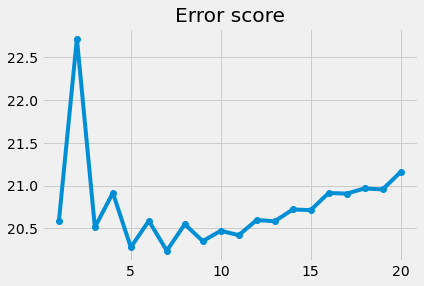

In [12]:
errors = []
nb_k = np.arange(1,21,1)

for k in nb_k:
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(nb_k, errors, 'o-')
plt.title("Error score")
plt.show()

In [13]:
from sklearn import neighbors, metrics
from sklearn import model_selection

# Builing model 

nb_k = np.arange(1,10,1)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors': nb_k}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 9}
Résultats de la validation croisée :
accuracy = 0.788 (+/-0.004) for {'n_neighbors': 1}
accuracy = 0.766 (+/-0.004) for {'n_neighbors': 2}
accuracy = 0.789 (+/-0.003) for {'n_neighbors': 3}
accuracy = 0.786 (+/-0.004) for {'n_neighbors': 4}
accuracy = 0.793 (+/-0.004) for {'n_neighbors': 5}
accuracy = 0.789 (+/-0.003) for {'n_neighbors': 6}
accuracy = 0.792 (+/-0.002) for {'n_neighbors': 7}
accuracy = 0.791 (+/-0.003) for {'n_neighbors': 8}
accuracy = 0.793 (+/-0.002) for {'n_neighbors': 9}


In [14]:
# Make prediction
y_pred = clf.predict(X_test)

# Saving results
knn_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )

Accuracy :  0.796


## Random forest

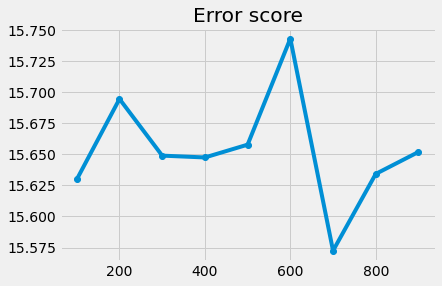

In [15]:
from sklearn.ensemble import RandomForestClassifier

errors = []
nb_e = [100,200,300,400,500,600,700,800,900]

for e in nb_e:
    rfc = RandomForestClassifier(n_estimators=e, oob_score=True)
    errors.append(100*(1 - rfc.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(nb_e, errors, 'o-')
plt.title("Error score")
plt.show()

In [16]:
from sklearn import model_selection

# Builing model 

nb_e = [500,600,700]

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators': nb_e}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur rf avec recherche d'hyperparamètre par validation croisée
rfc = model_selection.GridSearchCV(
    RandomForestClassifier(oob_score=True), # un classifieur rf
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
rfc.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rfc.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        rfc.cv_results_['mean_test_score'], # score moyen
        rfc.cv_results_['std_test_score'],  # écart-type du score
        rfc.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_estimators': 700}
Résultats de la validation croisée :
accuracy = 0.842 (+/-0.003) for {'n_estimators': 500}
accuracy = 0.842 (+/-0.002) for {'n_estimators': 600}
accuracy = 0.842 (+/-0.003) for {'n_estimators': 700}


In [17]:
# Make prediction
y_pred = rfc.predict(X_test)


# Saving results
rfc_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )

Accuracy :  0.844


## Bagging

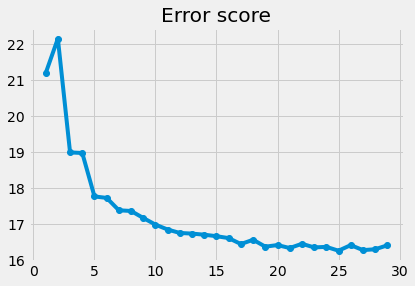

In [18]:
from sklearn.ensemble import BaggingClassifier 

errors = []
nb_k = np.arange(1,30,1)

for k in nb_k:
    bagging = BaggingClassifier(n_estimators=k)
    errors.append(100*(1 - bagging.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(nb_k, errors, 'o-')
plt.title("Error score")
plt.show()

In [19]:
# Builing model 

nb_k = np.arange(20,31,1)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators': nb_k}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur bagging avec recherche d'hyperparamètre par validation croisée
bagg = model_selection.GridSearchCV(
    BaggingClassifier(), # un classifieur bagging
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
bagg.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(bagg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        bagg.cv_results_['mean_test_score'], # score moyen
        bagg.cv_results_['std_test_score'],  # écart-type du score
        bagg.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_estimators': 29}
Résultats de la validation croisée :
accuracy = 0.833 (+/-0.003) for {'n_estimators': 20}
accuracy = 0.833 (+/-0.003) for {'n_estimators': 21}
accuracy = 0.832 (+/-0.002) for {'n_estimators': 22}
accuracy = 0.833 (+/-0.003) for {'n_estimators': 23}
accuracy = 0.833 (+/-0.002) for {'n_estimators': 24}
accuracy = 0.834 (+/-0.003) for {'n_estimators': 25}
accuracy = 0.834 (+/-0.002) for {'n_estimators': 26}
accuracy = 0.834 (+/-0.003) for {'n_estimators': 27}
accuracy = 0.834 (+/-0.002) for {'n_estimators': 28}
accuracy = 0.835 (+/-0.004) for {'n_estimators': 29}
accuracy = 0.834 (+/-0.003) for {'n_estimators': 30}


In [20]:
# Make prediction
y_pred = bagg.predict(X_test)

# Saving results
bagging_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )

Accuracy :  0.837


## NN

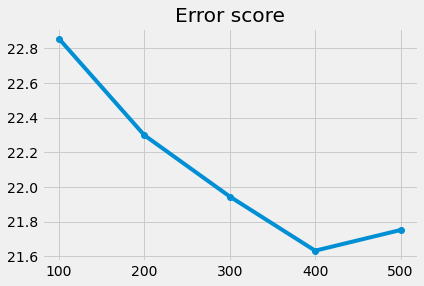

In [21]:
from sklearn.neural_network import MLPClassifier

errors = []
nb_e = [100,200,300,400,500]

for e in nb_e:
    mlp = MLPClassifier(max_iter=e)
    errors.append(100*(1 - mlp.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(nb_e, errors, 'o-')
plt.title("Error score")
plt.show()

In [22]:
# Builing model 

nb_e = [250,300,350,400]

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_iter': nb_e}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur mlp avec recherche d'hyperparamètre par validation croisée
mlp = model_selection.GridSearchCV(
    MLPClassifier(), # un classifieur mlp
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
mlp.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(mlp.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        mlp.cv_results_['mean_test_score'], # score moyen
        mlp.cv_results_['std_test_score'],  # écart-type du score
        mlp.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_iter': 300}
Résultats de la validation croisée :
accuracy = 0.778 (+/-0.004) for {'max_iter': 250}
accuracy = 0.782 (+/-0.008) for {'max_iter': 300}
accuracy = 0.778 (+/-0.004) for {'max_iter': 350}
accuracy = 0.780 (+/-0.003) for {'max_iter': 400}


In [23]:
# Make prediction
y_pred = mlp.predict(X_test)

# Saving results
nn_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )

Accuracy :  0.781


## SCORING

In [24]:
# intialise data of lists. 
acc = {'Model':['kNN', 'Random Forest', "Bagging", "NN"],
        'Accuracy':[knn_acc,rfc_acc,bagging_acc, nn_acc]} 
  
# Create DataFrame 
df = pd.DataFrame(acc) 
  
# Print the output. 
df

,Model,Accuracy
0,kNN,0.796
1,Random Forest,0.844
2,Bagging,0.837
3,NN,0.781


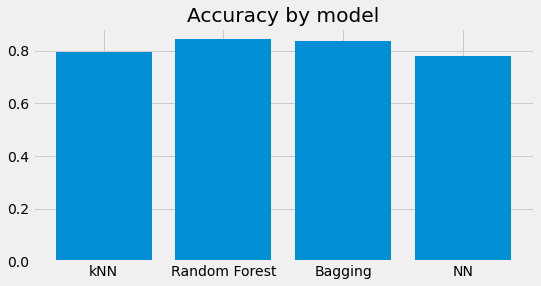

In [25]:
plt.figure(figsize=(8,4))
plt.bar(df["Model"],df["Accuracy"])
plt.title("Accuracy by model")
plt.show()

# PRODUCTION

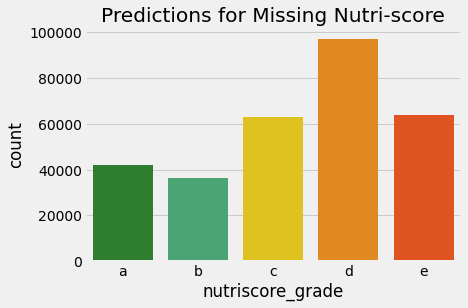

In [26]:
# Make prediction
y_pred = rfc.predict(data_unknown[col_nutrition])

# reverse label encoding
data_unknown["nutriscore_grade"] = labelencoder.inverse_transform(y_pred)

# ploting results
data_unknown["nutriscore_grade"] = data_unknown["nutriscore_grade"].astype('category')
sns.countplot(x="nutriscore_grade",data=data_unknown,
           palette = custom_palette)
plt.title("Predictions for Missing Nutri-score")
plt.show()

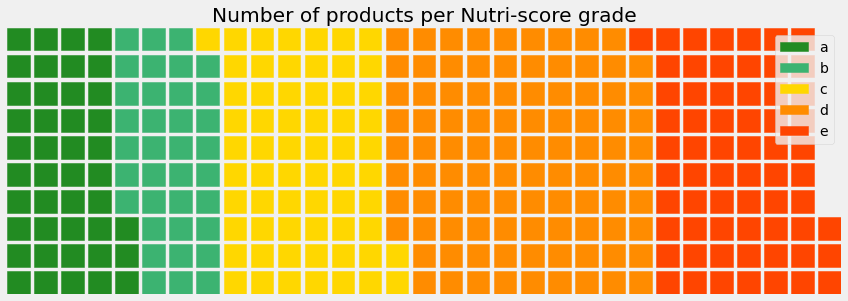

In [27]:
temp  = data_unknown.groupby('nutriscore_grade').count().reset_index()

temp["energy_kcal_100g"] = temp["energy_kcal_100g"].astype('int')
temp["energy_kcal_100g"] = temp["energy_kcal_100g"]/1000
values = temp["energy_kcal_100g"].values
labels = temp.nutriscore_grade

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=values,
    labels=list(labels),
    figsize=(12, 8),
    colors=["forestgreen", "mediumseagreen","gold","darkorange","orangered"])

plt.title("Number of products per Nutri-score grade")
plt.show()